In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ucs = pd.read_csv('../../../data/clean/ucs_cleaned.csv', parse_dates=['launch_date'])

In [35]:
ucs.dtypes

satellite_name                 object
official_name                  object
un_registry                    object
country_operator               object
operator_owner                 object
users                          object
purpose                        object
orbit_class                    object
orbit_type                     object
geo_longitude                 float64
perigee_km                    float64
apogee_km                     float64
eccentricity                  float64
inclination_degrees           float64
period_minutes                 object
launch_mass_kg                float64
launch_date            datetime64[ns]
lifetime_years                float64
contractor                     object
contractor_country             object
launch_site                    object
launch_vehicle                 object
cospar_id                      object
norad_id                        int64
dtype: object

LAUNCH MASS

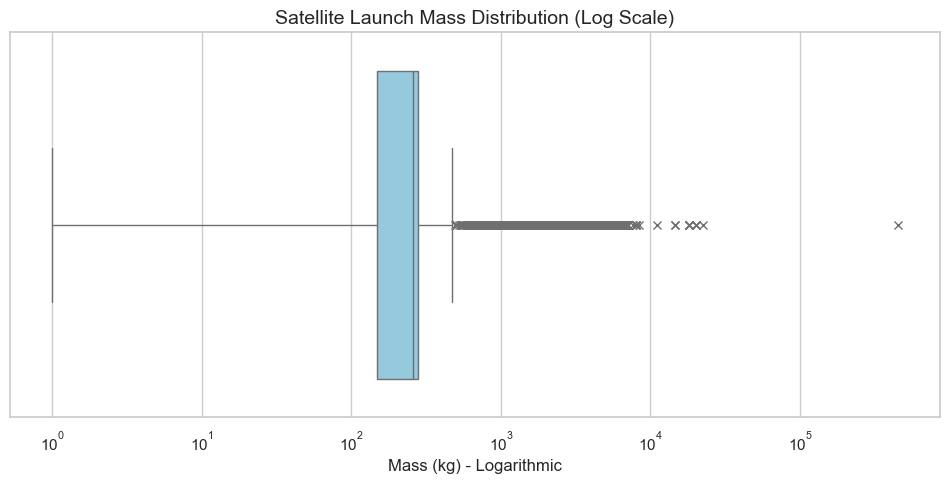

In [36]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=ucs['launch_mass_kg'], color='skyblue', 
            flierprops={"marker": "x", "markerfacecolor": "red"})

plt.xscale('log')

plt.title('Satellite Launch Mass Distribution (Log Scale)', fontsize=14)
plt.xlabel('Mass (kg) - Logarithmic', fontsize=12)
plt.show()

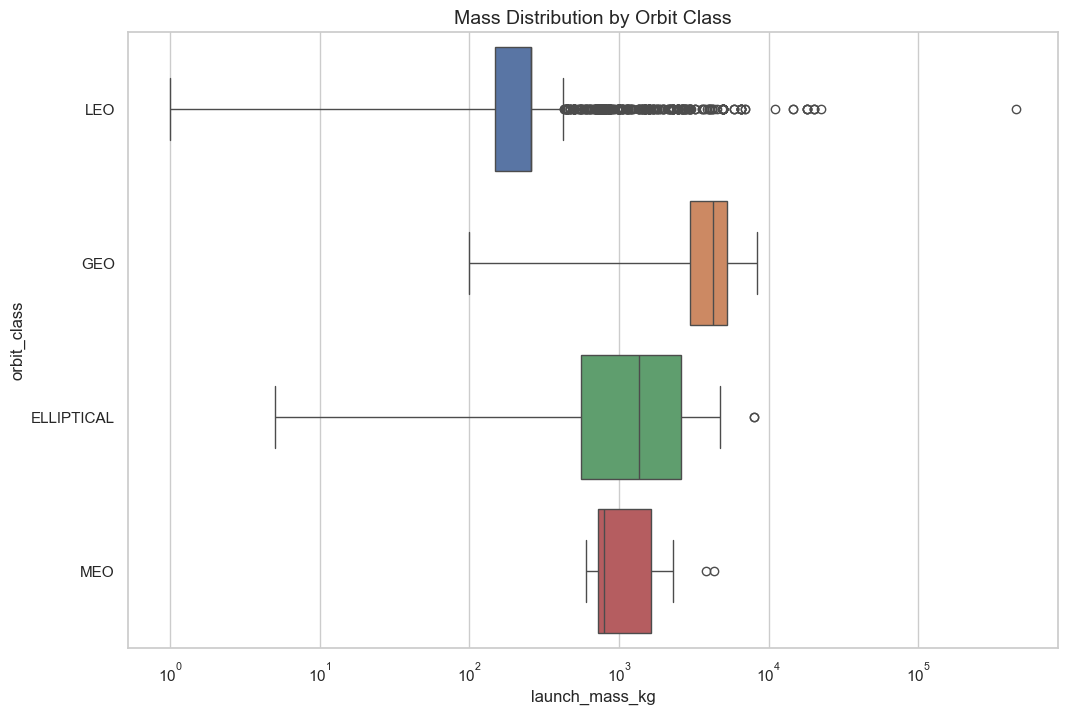

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=ucs, 
            x='launch_mass_kg', 
            y='orbit_class', 
            hue='orbit_class', 
            legend=False)

plt.xscale('log')

plt.title('Mass Distribution by Orbit Class', fontsize=14)
plt.show()

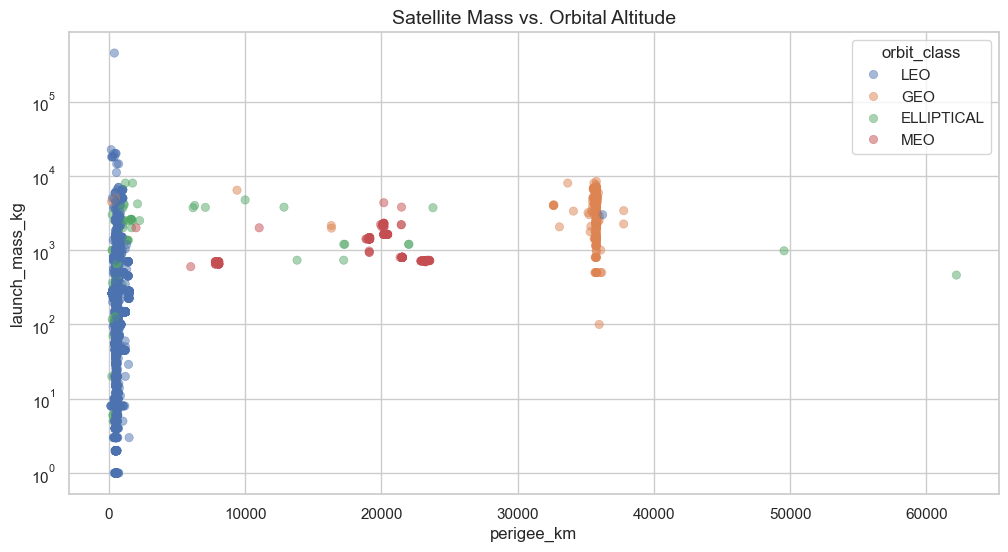

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
                data = ucs,
                x = 'perigee_km',
                y = 'launch_mass_kg', 
                hue = 'orbit_class',
                alpha = 0.5,
                edgecolor = None)

plt.yscale('log')
plt.title('Satellite Mass vs. Orbital Altitude', fontsize=14)
plt.show()

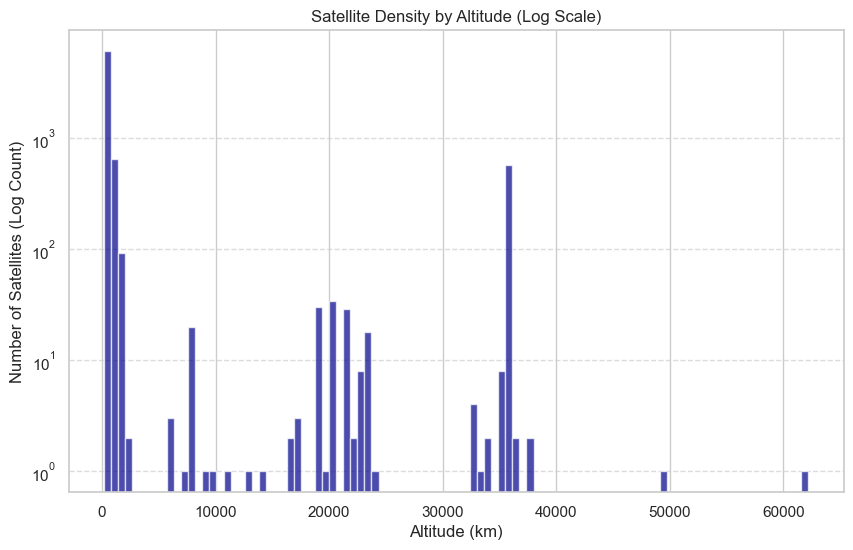

In [39]:
plt.figure(figsize=(10,6))
plt.hist(ucs['perigee_km'], bins=100, color='darkblue', alpha=0.7)
plt.yscale('log') 
plt.title('Satellite Density by Altitude (Log Scale)')
plt.xlabel('Altitude (km)')
plt.ylabel('Number of Satellites (Log Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='launch_date'>

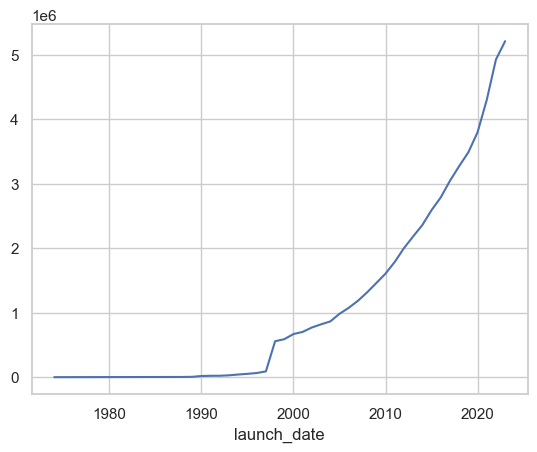

In [40]:
mass_trend = ucs.groupby(ucs['launch_date'].dt.year)['launch_mass_kg'].sum().cumsum()
mass_trend.plot()

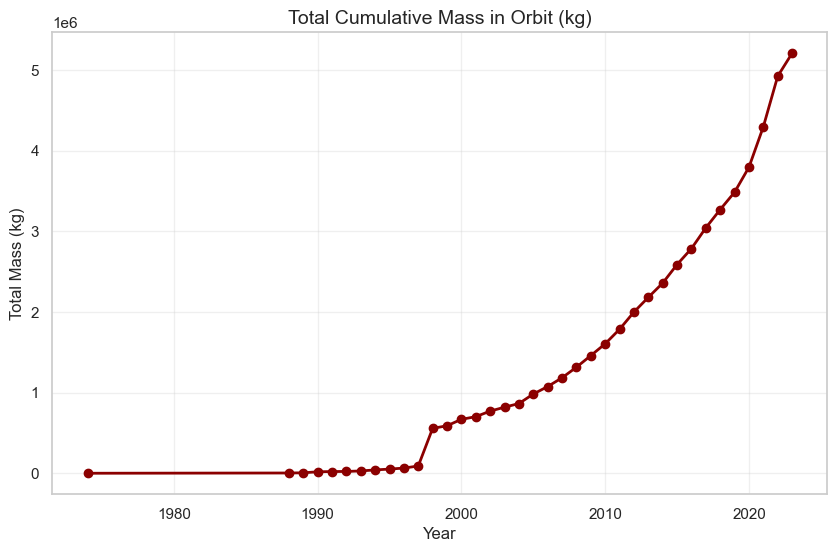

In [41]:
mass_by_year = ucs.groupby(ucs['launch_date'].dt.year)['launch_mass_kg'].sum().cumsum()

plt.figure(figsize=(10, 6))

mass_by_year.plot(kind='line', marker='o', color='darkred', linewidth=2)

plt.title('Total Cumulative Mass in Orbit (kg)', fontsize=14)
plt.ylabel('Total Mass (kg)')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.show()

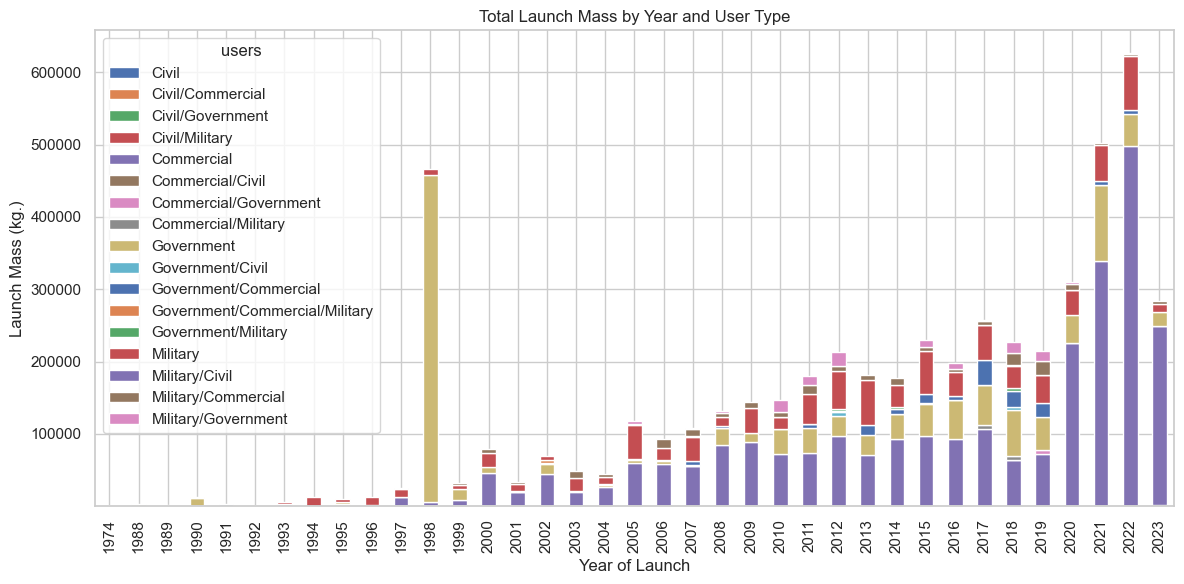

In [42]:
ucs['launch_date'] = pd.to_datetime(ucs['launch_date'])

ucs['Year'] = ucs['launch_date'].dt.year

summary = ucs.pivot_table(
    index='Year',
    columns='users',
    values='launch_mass_kg',
    aggfunc='sum',
    observed=False
)

summary.plot(kind='bar', figsize=(12, 6), rot=90, stacked=True)

plt.title("Total Launch Mass by Year and User Type")
plt.ylabel("Launch Mass (kg.)")
plt.xlabel("Year of Launch")
plt.tight_layout()
plt.show()